In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import math
import scipy.stats
import numpy as np
import seaborn as sns
from sklearn import preprocessing


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.drop('id', axis = 1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [35]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# NULL FILL IN MEDIAN

df["bmi"].fillna((df["bmi"].median()), inplace = True)
df["bmi"].median()

28.1

In [16]:
# CHECKING HOW MANY RECORDS HAVE STROKE

is_stroke = df[df["stroke"] == 1 ].count()
is_stroke_p = round((is_stroke[0] * 100 / df["stroke"].count()),2)
isnt_stroke = df[df["stroke"] == 0 ].count()
isnt_stroke_p = round((isnt_stroke[0] * 100 / df["stroke"].count()),2)

In [18]:
print(f"The Stroke is recognized in {is_stroke[0]} patients ({is_stroke_p}%), \n{isnt_stroke[0]} patients are ({isnt_stroke_p}%) free of this disease.")

The Stroke is recognized in 249 patients (4.87%), 
4861 patients are (95.13%) free of this disease.


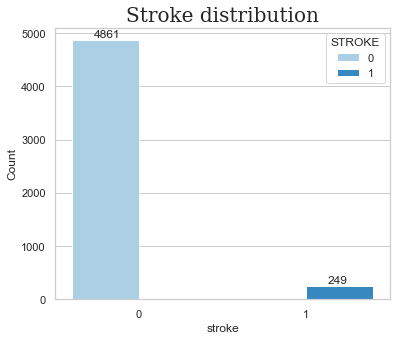

In [34]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='stroke',data=df, palette='Blues',hue='stroke', saturation = 2.5)
plt.title("Stroke distribution", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+60))

ax.set(ylabel = "Count")
pass

In [37]:
# CHANGING OBJECT-COLUMNS TO INT

le = preprocessing.LabelEncoder()

In [53]:
df_copy = df.copy()
object_list = df_copy.select_dtypes(include = "object").columns
for column in object_list:
    df_copy[column] = le.fit_transform(df_copy[column])

Text(2, 0, 'Heatmap of Data correlation')

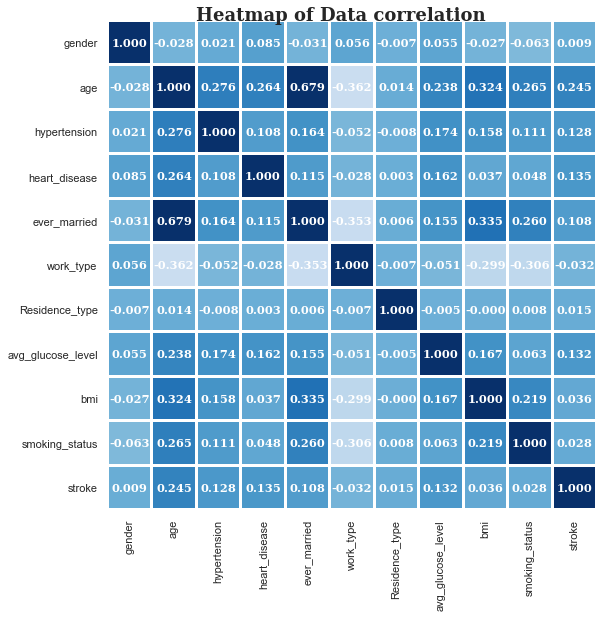

In [60]:
# CORRELATION

plt.figure(figsize=(9,9))
sns.heatmap(df_copy.corr(), annot=True, fmt=".3f", cmap = 'Blues', center = 0,
           vmin=-0.362, vmax=0.679, cbar = False,
           linewidth = 2, square = True, annot_kws = {'font':'serif', 'size':11.5, 'color':'white', 'fontweight':'bold'} )
plt.text(2,0,'Heatmap of Data correlation',fontsize=18, fontweight='bold',fontfamily='serif')

In [ ]:
# COMMENTS: I looked at correlation between stroke and others. Selected three fetures - age, heart_disease, hypertension.
# Also I checked if these features haven't very high correlations between themself, because I want to avoid situation, that two features 
# have influence at result, but their reasons are reflected by the same thing. For example, if feature ever_married had high correlation 
# with stroke and age, I would rejected one of them. In reality it has only correlate with age, not stroke, but it is quite obvious. The 
# older people are, the more marriages (divorces) get. 
# In our feature hypertension and age are a little bit correlate (make sense), but I left it.
# It should be mentioned that selected features are not strong correlete with target.

In [77]:
# CHECKING DETAILES FOR ONE NO SELECTED FEATURE

set(df["gender"])

{'Female', 'Male', 'Other'}

In [83]:
female = df[df["gender"]=="Female"].count()
female_p = round((female[0] * 100 / df["gender"].count()),2)
female_stroke = df[(df["gender"] == "Female") & (df["stroke"] == 1)].count()
femuale_stroke_p = round((female_stroke[0] * 100 / female[0]),2)

male = df[df["gender"]=="Male"].count()
male_p = round((male[0] * 100 / df["gender"].count()),2)
male_stroke = df[(df["gender"] == "Male") & (df["stroke"] == 1)].count()
male_stroke_p = round((male_stroke[0] * 100 / male[0]),2)
  
other = df[df["gender"]=="Other"].count()
other_p = round((other[0] * 100 / df["gender"].count()),2)
other_stroke = df[(df["gender"] == "Other") & (df["stroke"] == 1)].count()
other_stroke_p = round((other_stroke[0] * 100 / other[0]),2)

In [84]:
print(f"There are {female[0]} women in dataset ({female_p}% of all).")
print(f"    {female_stroke[0]} of them experienced Stroke ({femuale_stroke_p}%).")
print(f"There are {male[0]} men in data set ({male_p}% of all).")
print(f"    {male_stroke[0]} of them experienced Stroke ({male_stroke_p}%).")
print(f"Additionally there is {other[0]} person whose sex is unknown.")
if other_stroke[0] == 0:
    print ("    This person didn't experience the Stroke.")
elif other_stroke[0] == 1:
    print ("    This person experienced the Stroke.")   
else:
    print(f"    {other_stroke[0]} of them experienced the Stroke ({other_stroke_p}%).")

There are 2994 women in dataset (58.59% of all).
    141 of them experienced Stroke (4.71%).
There are 2115 men in data set (41.39% of all).
    108 of them experienced Stroke (5.11%).
Additionally there is 1 person whose sex is unknown.
    This person didn't experience the Stroke.


[Text(0, 0.5, 'Count')]

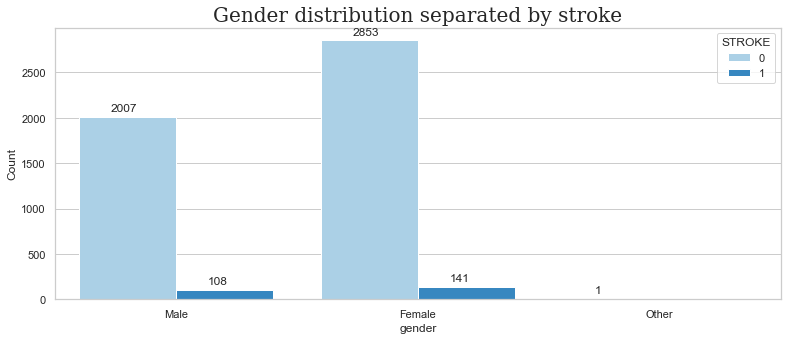

In [101]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='gender',data=df, palette='Blues',hue='stroke', saturation =2.5)
plt.title("Gender distribution separated by stroke", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+60))

ax.set(ylabel = "Count")

In [90]:
# CHECKING DETAILES FOR ONE SELECTED FEATURE

df[["age"]].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


c:\Users\Blazej\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age - density distribution')

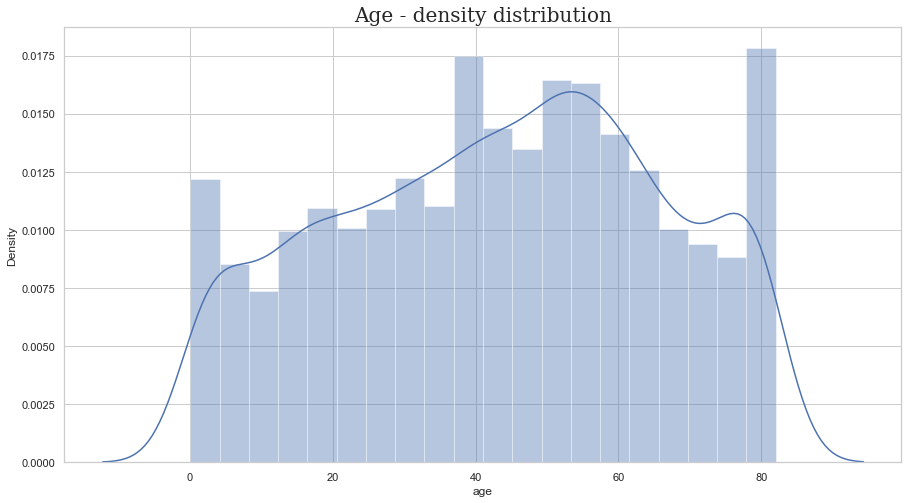

In [106]:
plt.figure(figsize=(15,8))
sns.color_palette("Blues")
ax_hist = sns.distplot(df["age"], norm_hist=True)
ax.set_xlabel("age distribution", fontsize = 20)
ax.set_ylabel("density", fontsize = 20)
plt.title("Age - density distribution", fontsize = 20, fontfamily='serif')

In [ ]:
# COMMENT: We can see that density pick up and pick down immediately, because first (the younges population) and the last (the oldest population) bar 
# are high. Distribution of of age can relect the reality, because the biggest group is between 40 and 60 years. So we can conclude, that the risk of 
# stroke increase close to 40 years old, so people want to examinate themself (and also they had stroke) so we have more and more records. On the other 
# hands after 60 (60+) amount record decrease because some people died, so the population is not so large.

In [107]:
# DEVIDING INTO AGE GROUP

df.loc[(df["age"] < 20.0), "age_group"] = "teenagers"
df.loc[(df["age"] >= 20) & (df["age"] <30), "age_group"] = "20years"
df.loc[(df["age"] >= 30) & (df["age"] <40), "age_group"] = "30years"
df.loc[(df["age"] >= 40) & (df["age"] <50), "age_group"] = "40years"
df.loc[(df["age"] >= 50) & (df["age"] <60), "age_group"] = "50years"
df.loc[(df["age"] >= 60) & (df["age"] <70), "age_group"] = "60yeras"
df.loc[df["age"] >= 70, "age_group"] = "70+"

In [26]:
df_copy2 = df.copy()

In [110]:
age_for_plot = df.sort_values(["age"])

Text(0.5, 1.0, 'Age distribution separated by Stroke')

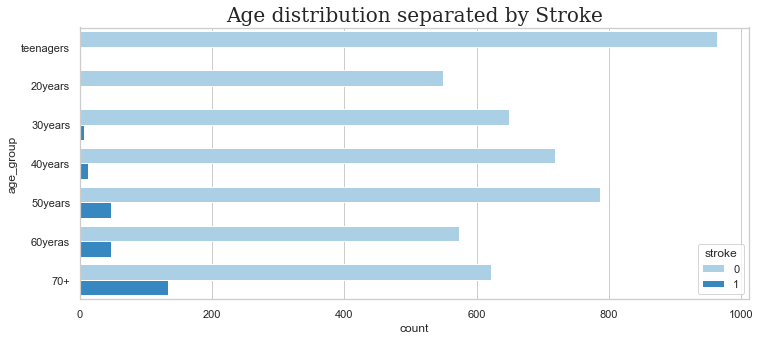

In [115]:
plt.figure(figsize = (12,5))
ax = sns.countplot(y="age_group", data=age_for_plot, palette="Blues", hue= 'stroke', saturation =2.5)
plt.title("Age distribution separated by Stroke", fontsize = 20, fontfamily='serif')

Text(0.5, 1.0, 'Age - Stroke Distribution')

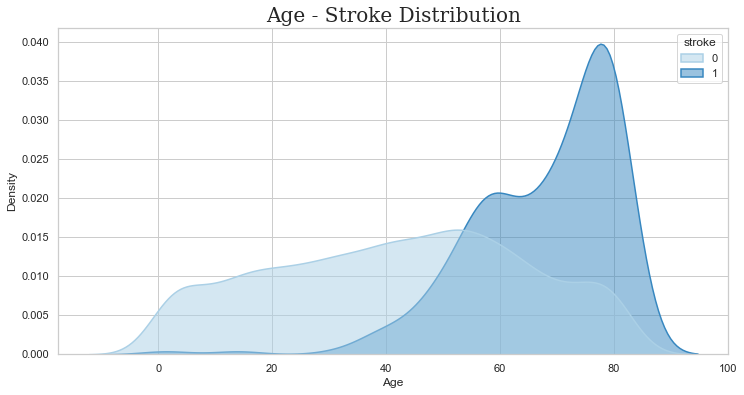

In [119]:
plt.figure(figsize = (12,6))
ax= sns.kdeplot(
   data=df, x="age", hue="stroke",
   fill=True, common_norm=False, palette="Blues",
   alpha=.5, linewidth=1.5)

plt.xlabel('Age')
plt.title('Age - Stroke Distribution', fontsize = 20, fontfamily='serif')

In [ ]:
# COMMENT: Risk of stroke rise in the 40s till 60. It is first jump up and secend significat jum up start before 70s (till 80s). 
# (There is not a lot of records after 80s in dataset.)